In [1]:
import numpy as np
from scipy.signal import convolve2d as conv2

from skimage import color, data
import deconv as d
import graphics as g
import metrics as m

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro_blurred = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

0.0575


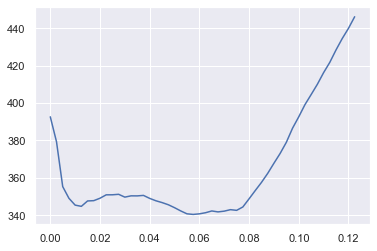

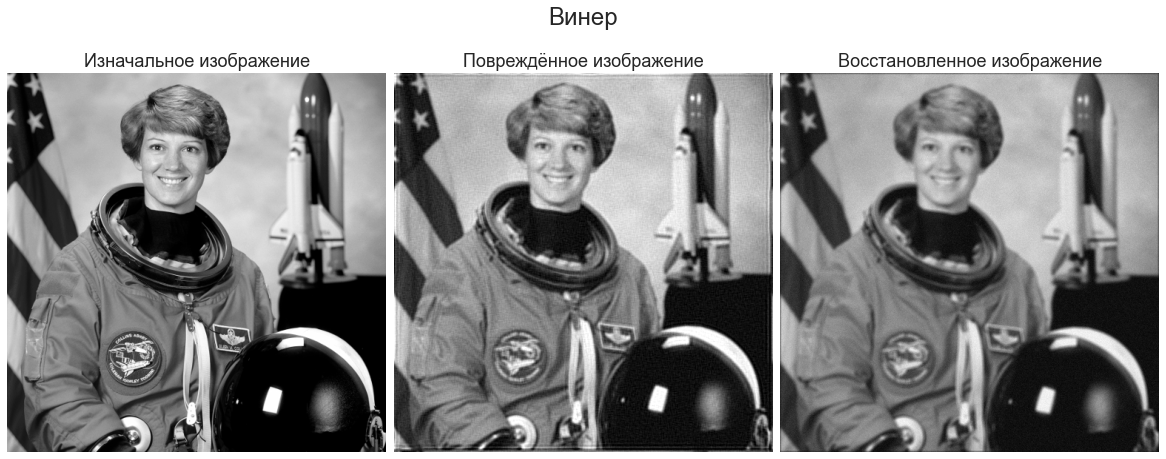

In [16]:
dec_model = d.wiener(astro_noisy, psf)
dec_model.debug_graph(astro, m.histogram, step = 0.0025)
g.plot3imgs(astro, dec_model.recover_image(0.0575), astro_noisy, suptitle='Винер')

0.00011


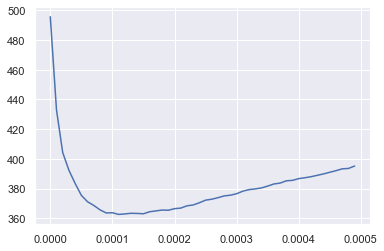

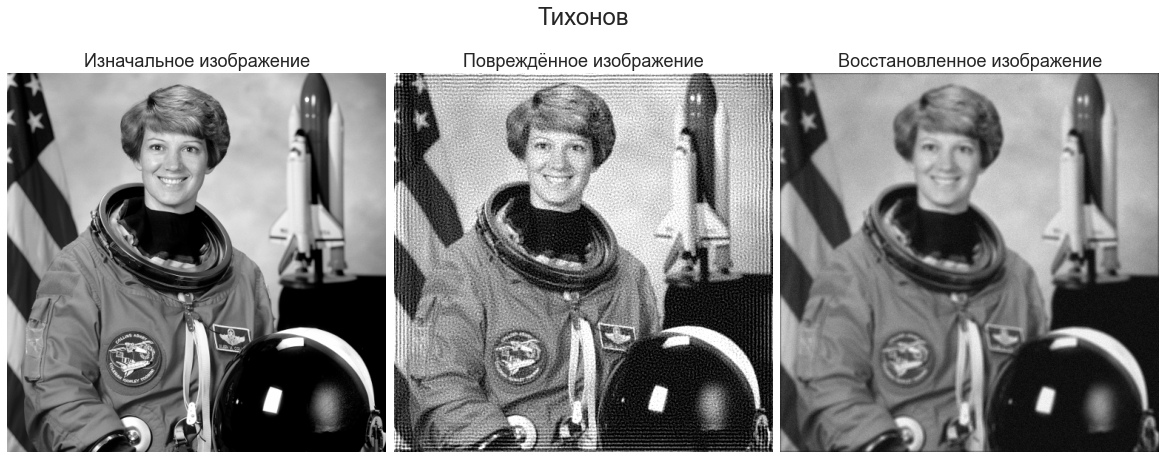

In [13]:
dec_model = d.tykhonov(astro_noisy, psf)
dec_model.debug_graph(astro, m.histogram, step = 0.00001)
g.plot3imgs(astro, dec_model.recover_image(0.00011), astro_noisy, suptitle='Тихонов')

In [ ]:
mse_list = []
n = []
k = 0.05/100
for i in range(200,300):
    est = d.wiener(astro_noisy, psf, p=i*k)
    mse_list.append(m.MSE(astro, est))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mse_list, title='График ошибок')


In [ ]:
est1 = d.wiener(astro_noisy, psf, p=0.125)
g.plot3imgs(astro, astro_noisy, est1, suptitle='Винеровский фильтр')

In [ ]:
print('MSE между изначльным и повреждённым    =', m.MSE(astro, astro_noisy))
print('MSE между изначльным и восстановленным =', m.MSE(astro, est1))

In [ ]:
mae_list = []
n = []
k = 0.05/100
for i in range(150,250):
    est = d.wiener(astro_noisy, psf, p=i*k)
    mae_list.append(m.MAE(astro, est))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mae_list, title='График ошибок')

In [ ]:
est2 = d.wiener(astro_noisy, psf, p=0.097)
g.plot3imgs(astro, astro_noisy, est2, suptitle='Винеровский фильтр')

In [ ]:
print('MAE между изначльным и повреждённым    =', m.MAE(astro, astro_noisy))
print('MAE между изначльным и восстановленным =', m.MAE(astro, est1))

In [ ]:
g.plot3imgs(astro, est1, est2, suptitle='Винеровский фильтр')

In [ ]:
time_list = []
n = []
k = 0.05/100
for i in range(150,250):
    time = m.time_of_work(d.wiener, image = astro_noisy, psf = psf, p=i*k)
    time_list.append(time)

time_list = np.asarray(time_list)
print('Среднее время обработки одного изображения ', np.round(time_list.mean(), 3), 'c')

In [ ]:
mse_list = []
n = []
k = 0.05/100
for i in range(200,400):
    est = d.wiener(astro_noisy, psf, p=i*k)
    mse_list.append(m.MSE_center(astro, est, n=100))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mse_list, title='График ошибок')

In [ ]:
est2 = d.wiener(astro_noisy, psf, p=0.125)
g.plot3imgs(astro, astro_noisy, est2, suptitle='Винеровский фильтр')

In [ ]:
print('MAE между изначльным и повреждённым    =', m.MAE_center(astro, astro_noisy, n=100))
print('MAE между изначльным и восстановленным =', m.MAE_center(astro, est2, n=100))
print('MSE между изначльным и повреждённым    =', m.MSE_center(astro, astro_noisy, n=100))
print('MSE между изначльным и восстановленным =', m.MSE_center(astro, est2, n=100))

In [ ]:
mae_list = []
n = []
k = 0.05/100
for i in range(100,300):
    est = d.wiener(astro_noisy, psf, p=i*k)
    mae_list.append(m.MAE_center(astro, est, n=100))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mae_list, title='График ошибок')

In [ ]:
est2 = d.wiener(astro_noisy, psf, p=0.095)
g.plot3imgs(astro, astro_noisy, est2, suptitle='Винеровский фильтр')

In [ ]:
print('MAE между изначльным и повреждённым    =', m.MAE_center(astro, astro_noisy, n=100))
print('MAE между изначльным и восстановленным =', m.MAE_center(astro, est2, n=100))
print('MSE между изначльным и повреждённым    =', m.MSE_center(astro, astro_noisy, n=100))
print('MSE между изначльным и восстановленным =', m.MSE_center(astro, est2, n=100))

In [ ]:
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

grad_x = conv2(astro, kernelx)
grad_y = conv2(astro, kernely)
grad = (grad_x + grad_y)/2

g.plot3imgs(grad_x, grad_y, grad, suptitle='Винеровский фильтр')

In [ ]:
asd = np.histogram(grad_x, 255)
asd1 = np.histogram(grad_y, 255)
asd2 = np.histogram(grad, 255)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(np.asarray(asd2[1])[0:255], asd[0])

plt.show()